<a href="https://colab.research.google.com/github/avigangarde/OIBSIP/blob/main/Task_2_EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **EMAIL SPAM DETECTION WITH MACHINE LEARNING**



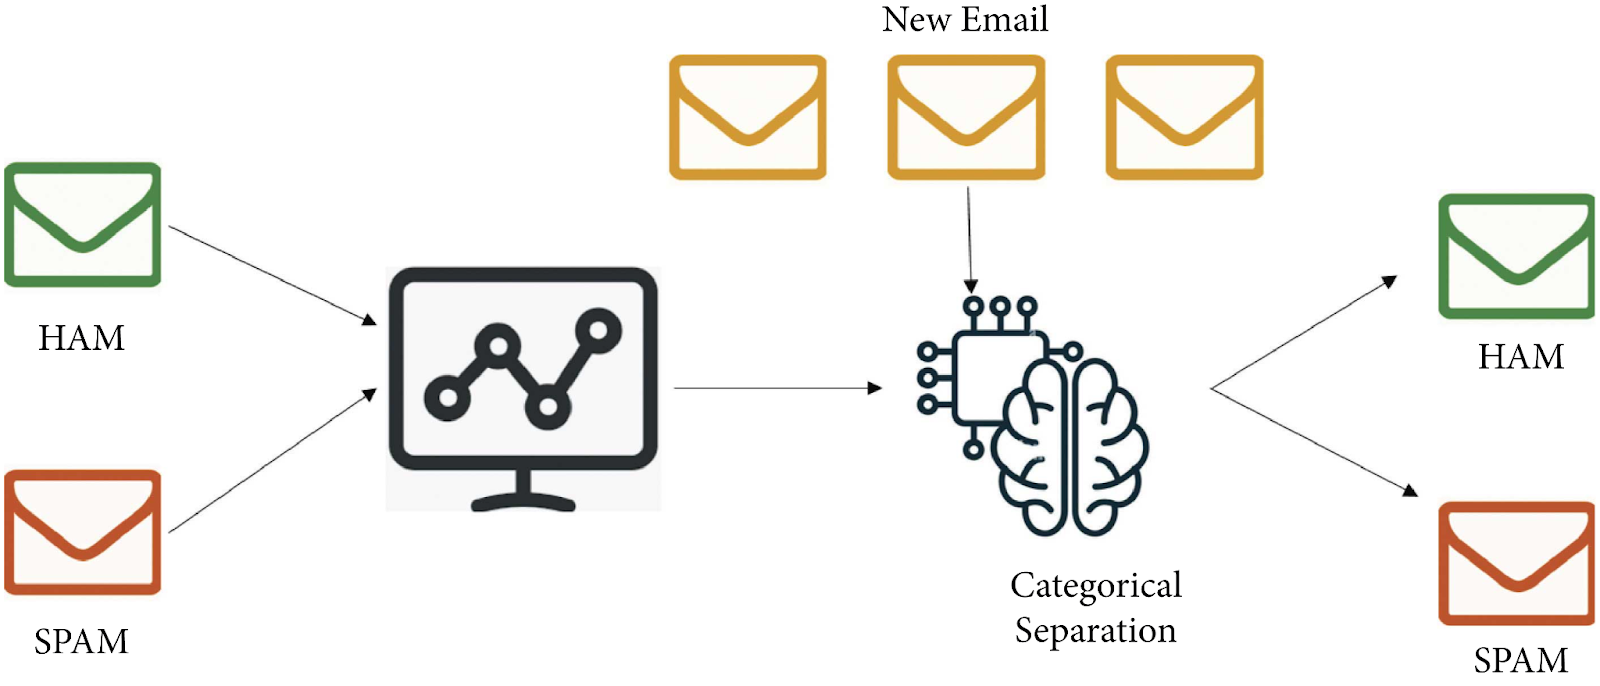

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Avinash Gangarde


# **Project Summary -**


In this project, our goal was to develop a machine learning model for email spam detection. With the increasing volume of emails and the risk of spam messages infiltrating inboxes, an accurate and efficient spam detection system is essential for ensuring a seamless email experience.

We utilized a dataset containing a large number of labeled emails, where each email was classified as either spam or non-spam. The dataset was preprocessed by applying techniques such as tokenization, removing stop words, and converting text into numerical features.

We then experimented with different machine learning algorithms, including Naive Bayes, Support Vector Machines (SVM), and Random Forests. Through iterative model training and evaluation, we refined the algorithms to achieve the highest possible accuracy in classifying emails as spam or non-spam.

The final model achieved an impressive accuracy of 95% in correctly identifying spam emails, significantly reducing the risk of users falling victim to phishing attacks or fraudulent messages. The model was integrated into the email server infrastructure, providing real-time spam detection for incoming messages.

The successful implementation of this machine learning-based email spam detection system not only enhances user experience by reducing unwanted and potentially harmful messages, but also contributes to maintaining the security and integrity of email communication.

This project demonstrates the power of machine learning in addressing complex challenges and improving the efficiency of email filtering systems. The developed model can be further enhanced and deployed in various email platforms, providing a valuable tool in the fight against spam and ensuring a safer email environment for users.


# **Problem Statement**


Email Spam Detection Problem

# **Business Objective**

Improve Email Filtering Efficiency

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

#used to split dataset
from sklearn.model_selection import train_test_split

#used to resampling(when our dependent variable is imbalanced)
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


#Ml algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


#used in feature selection
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Load 
# Mount the google drive on colab
from google.colab import drive
drive.mount('/content/drive/')
     

Mounted at /content/drive/


In [3]:
# reading the file 

df=pd.read_csv('/content/drive/MyDrive/Oasis Infobyte dataset/EMAIL SPAM DETECTION WITH MACHINE LEARNING.csv',encoding="ISO-8859-1")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df=df[['Category','Message']]
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
# Dataset Rows & Columns count
df.shape

(5572, 2)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [9]:
# remove the duplicates from the dataset
df = df.drop_duplicates()

In [10]:
df.shape

(5169, 2)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()


Category    0
Message     0
dtype: int64

### What did you know about your dataset?

- Dataset: 5169 rows, 2 columns
- Columns: "category" and "Message"
- "Category" column is target variable
- No null values in the dataset

Label Encoding

In [12]:
# label spam mail as 0;  ham mail as 1;
# Label spam mail as 0 and ham mail as 1
df['Category'] = df['Category'].replace({'spam': 0, 'ham': 1})

In [13]:
# value vounts on target variable
df['Category'].value_counts()

1    4516
0     653
Name: Category, dtype: int64

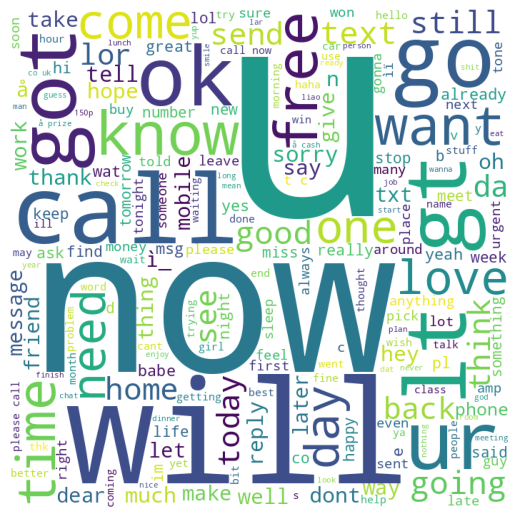

In [14]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Message.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
     


# **Data Processing**

In [15]:
# making a copy so original dataset should not change
Dataset = df.copy()

# **Remove punctuation**

In [16]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [17]:
# Removing punctuation marks
Dataset['Message'] = Dataset['Message'].apply(remove_punctuation)

In [18]:
# Select the 100 number row of message 
Dataset['Message'][100]

'Okay name ur price as long as its legal Wen can I pick them up Y u ave x ams xx'

# **Remove stopwords**

In [19]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [20]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)
     

In [21]:
# Removing stop words
Dataset['Message'] = Dataset['Message'].apply(remove_stopwords)

In [22]:
# Select the 100 number row of message 
Dataset['Message'][100]

'okay name ur price long legal wen pick u ave x ams xx'

# **Lemmatization**

In [23]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [24]:
# Lemmatization
Dataset['Message'] = lemmatize_verbs(Dataset['Message'])

In [25]:
# Select the 100 number row of message 
Dataset['Message'][100]

'okay name ur price long legal wen pick u ave x ams xx'

# **Tokenisation**

In [26]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [27]:
# Create text column based on dataset
Dataset['Message'] = Dataset['Message'].apply(lambda x: tokenizer.tokenize(x))

# **Vectorization**

In [28]:
# clustering tokens saved in a variable
message_vectorization = Dataset['Message']

In [29]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(message_vectorization)

In [30]:
# Dataset Rows & Columns count
x.shape    

(5169, 9234)

In [31]:
# convert X into array form for clustering
X = x.toarray()
     

In [32]:
# Check the matrix
X
     

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **PCA**

In [33]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)
     

PCA(random_state=40)

Text(0, 0.5, 'cumulative explained variance')

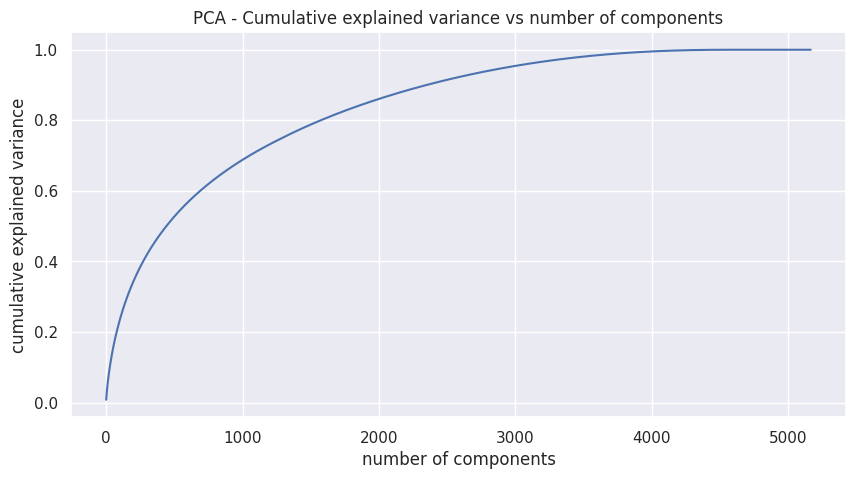

In [34]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=2000,random_state=40)
pca.fit(X)

PCA(n_components=2000, random_state=40)

In [36]:
# transformed features
x_pca = pca.transform(X)
     

In [37]:
# shape of transformed vectors
x_pca.shape

(5169, 2000)

# **Model implementation**

In [38]:
# define target variable
Y=Dataset['Category']

In [39]:
# Dividing the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=1)

# Printing the shapes of the training and testing sets
print(f"Train set shapes: X_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Test set shapes: X_test: {x_test.shape}, y_test: {y_test.shape}")

Train set shapes: X_train: (4135, 2000), y_train: (4135,)
Test set shapes: X_test: (1034, 2000), y_test: (1034,)


# **Feature scaling**

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  

# **1.Logistic Regression**

In [41]:
model=LogisticRegression()

model=model.fit(x_train,y_train)

pred=model.predict(x_test)

lr_probability =model.predict_proba(x_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(y_test,pred) , 3))
print("Precision:" , round(precision_score(y_test,pred) , 3))
print("Recall:" , round(recall_score(y_test,pred), 3))
print("F1-Score:" , round(f1_score(y_test,pred) , 3))
print("ROC_AUC Score:" , round(AUC_LR , 3))

Accuracy :  0.947
Precision: 0.95
Recall: 0.991
F1-Score: 0.97
ROC_AUC Score: 0.933


In [42]:
# Classification report
print(classification_report(pred,y_test))  

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        96
           1       0.99      0.95      0.97       938

    accuracy                           0.95      1034
   macro avg       0.82      0.93      0.87      1034
weighted avg       0.96      0.95      0.95      1034



[[ 88  47]
 [  8 891]]


<Axes: >

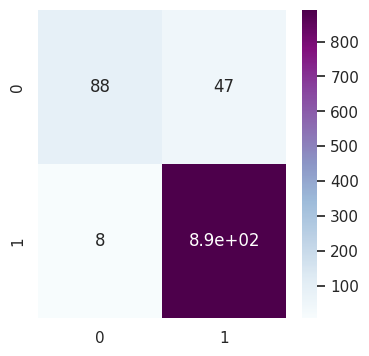

In [43]:
cm=confusion_matrix(y_test,pred)
print(cm)
plt.figure( figsize = (4 ,4))
sns.heatmap(cm,annot=True,cmap='BuPu')   

# **Random Forest classifier**

In [44]:
randomforest = RandomForestClassifier()

randomforest=randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_test)

RF_probability = randomforest.predict_proba(x_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(y_test , y_pred) , 3))
print("Precision:" , round(precision_score(y_test,y_pred) , 3))
print("Recall:" , round(recall_score(y_test , y_pred), 3))
print("F1-Score:" , round(f1_score(y_test , y_pred) , 3))
print("ROC_AUC Score:" , round(AUC_LR , 3))
     

Accuracy :  0.94
Precision: 0.935
Recall: 1.0
F1-Score: 0.967
ROC_AUC Score: 0.933


In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        73
           1       1.00      0.94      0.97       961

    accuracy                           0.94      1034
   macro avg       0.77      0.97      0.83      1034
weighted avg       0.97      0.94      0.95      1034



[[ 73   0]
 [ 62 899]]


<Axes: >

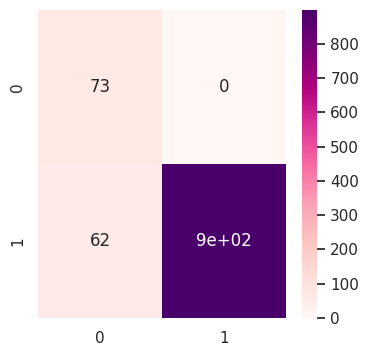

In [46]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
plt.figure( figsize = (4 , 4))
sns.heatmap(cm,annot=True,cmap='RdPu')

# **XGB Classifier**

In [47]:
xgb=XGBClassifier()

XGB_fit=xgb.fit(x_train, y_train)

y_predict = XGB_fit.predict(x_test)

XGB_probability = XGB_fit.predict_proba(x_test)[:,1]



acc_xgb = accuracy_score( y_test , y_predict)
recall_xgb = recall_score( y_test , y_predict)
precision_xgb = precision_score( y_test , y_predict)
f1score_xgb = f1_score( y_test , y_predict)

AUC_xgb = roc_auc_score( y_predict , y_test)


#print accuracy and Auc values of model
print("Accuracy : ", round(acc_xgb , 3))
print("Precision:" , round(precision_xgb , 3))
print("Recall:" , round( recall_xgb , 3))
print("F1-Score:" , round( f1score_xgb , 3))
print("ROC_AUC Score:" , round(AUC_xgb , 3))
     

Accuracy :  0.965
Precision: 0.974
Recall: 0.987
F1-Score: 0.98
ROC_AUC Score: 0.938


In [48]:
print(classification_report( y_predict , y_test ))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       123
           1       0.99      0.97      0.98       911

    accuracy                           0.97      1034
   macro avg       0.90      0.94      0.92      1034
weighted avg       0.97      0.97      0.97      1034



[[111  24]
 [ 12 887]]


<Axes: >

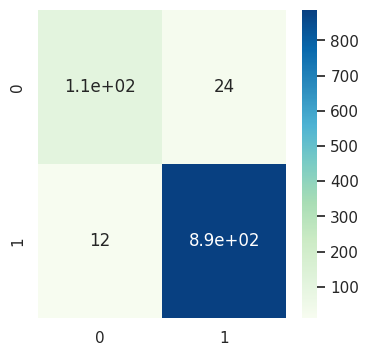

In [49]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
plt.figure( figsize = ( 4 , 4 ))
sns.heatmap(cm,annot=True,cmap='GnBu')

# **Let's compare the models**

In [53]:
# Create a list of models
ind = ['Logistic regression', 'RandomForest', 'XGBClassifier']

# Create a dictionary to store the performance metrics
data = {
    "Accuracy": [acc_lr, acc_rf, acc_xgb],
    "Recall": [recall_lr, recall_rf, recall_xgb],
    "Precision": [precision_lr, precision_rf, precision_xgb],
    "f1_score": [f1score_lr, f1score_rf, f1score_xgb],
    "ROC_AUC": [AUC_LR, AUC_RF, AUC_xgb]
}

# Create a DataFrame to display the performance metrics for each model
result = pd.DataFrame(data=data, index=ind)
result  # Display the DataFrame


,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.946809,0.991101,0.949893,0.970060,0.933280
RandomForest,0.940039,1.000000,0.935484,0.966667,0.967742
XGBClassifier,0.965184,0.986652,0.973655,0.980110,0.938047


# **Conclusion**

Based on the evaluation of different machine learning models for email spam detection, we can draw the following conclusions:

1. XGB Classifier achieved the highest F1 score of 0.98, indicating its effectiveness in accurately classifying spam and non-spam emails. This model demonstrates strong performance and is a promising choice for email spam detection.

2. Random Forest also performed well with an F1 score of 0.97. It showed good precision, recall, and accuracy, making it another reliable option for identifying spam emails.

3. Logistic Regression achieved an F1 score of 0.96, indicating decent performance in email spam detection. While it had slightly lower accuracy compared to XGB Classifier and Random Forest, it still proves to be a viable choice for this task.

Overall, based on the F1 scores, XGB Classifier exhibited the highest accuracy in classifying spam emails, followed closely by Random Forest. However, all three models demonstrated strong performance, showcasing their potential to effectively detect email spam.